# Statistical Methods for Financial Time Series using Python

_____
##### Project summary
The aim of this project is to study the financial time series data of an ETF portfolio created in 1999 and held till now. The strategy developed by the fund is based on Markovitz theory and consists of a well-balanced maximization of the risk premium while reducing the overall volatility, hence leading to the highest sharpe ratio. The portfolio allocation, built on a core of 30 of the largest US stocks is reviewed every quarter starting from December 2009 and rebalanced according to new financial evolution and perspective of the companies.

The main idea is to perform the analysis on data, fit the relevant time series model based on all the observations and try to predict some future values. 
_____
##### Contents
1. [Data analysis](#section1)
    1. [Preprocessing the data](#section1.A)
    2. [Building our portfolio](#section1.B)
    3. [Exploratory data analysis](#section1.C)
    4. [Data testing](#section1.D)
    5. [Fitting a GARCH(p,q) model](#section1.E)
    6. [Residual analysis](#section1.F)
    7. [Prediction with GARCH model](#section1.G)
2. [Macroeconomics study](#section2)
    1. [Preprocessing data for regression](#section2.A)
    2. [Ordinary Least Squares (OLS) regression](#section2.B)
3. [Conclusion](#section3)
    
_____

## <a id='section1'></a>1 $\bullet$ Data analysis
______

###  <a id='section1.A'></a>A $\bullet$ Preprocessing the data

First, let's start with the preprocessing of the data.

We first import and arrange the data. 
The data consists of weekly financial information pertaining to 30 large US firms. They are characterised by their **ticker** symbol:  

|A - F| G - M |O - Z|
| --- | ----- | --- |
| AAPL (Apple)| GE (General Electric) | ORCL (Oracle)
| BA (Boeing) | HD (Home Depot) | PFE (Pfizer)
| BAC (Bank of America) | IBM | PG (Procter & Gamble)
| C (Citigroup) | INTC (Intel) | T (AT&T)
|CSCO (Cisco) | JNJ (Johnson & Johnson) |  UNH (United Health)
|CVS (CVS Health) | JPM (JP Morgan) | UPS 
|CVX (Chevron) | K (Kellogg) | VZ (Verizon)
|D (Dominion Energy) | MCK (McKesson) | WFC (Wells Fargo)
|DIS (Disney) | MRK (Merck) | WMT (Walmart)
|F (Ford) | MSFT (Microsoft) | XOM (Exxon)

In [1]:
import numpy as np                     #library used to operate mathematical functions multi-dimensional arrays and matrices
import pandas as pd                    #library used for data manipulation and analysis
import scipy.stats as stats            #library used for statistical analysis
import datetime                        #library used for manipulating dates and times 
import matplotlib.pyplot as plt        #library used for creating static, animated, and interactive visualizations
import pandas_datareader as pdr        #library that offers up to date remote data access for pandas

import seaborn as sns                  #Data visualization library used to provide a high-level interface for 
sns.set()                              #drawing attractive and informative statistical graphics:
                                       #histograms, KDE, box plot, ...
import warnings
warnings.simplefilter('ignore', FutureWarning)
                                       #To suppress the future deprecation warning.

import pandas_datareader.data as web   #library used to download economics data from FRED website
from arch import arch_model            #library used to fit GARCH model for financial econometrics

import statsmodels.api as sm           #library used for the estimation of different statistical models (regression analysis)
from sklearn.linear_model import LinearRegression
                                       #library used to perform linear regression

import Sfunction                       #library created for definition of all the functions needed on this project 

In [2]:
#List our 30 tickers and write down each company name
tickers_list = 'AAPL BA BAC C CSCO CVS CVX D DIS F GE HD IBM INTC JNJ JPM K MCK MRK MSFT ORCL PFE PG T UNH UPS VZ WFC WMT XOM'                                                                           
tickers_to_names = {"AAPL" : "Apple", "BA" : "Boeing", "BAC" : "Bank of America", "C" : "Citigroup", "CSCO" : "Cisco",
                    "CVS" : "CVS Health", "CVX" : "Chevron", "D" : "Dominion Energy", "DIS" : "Disney", "F" : "Ford",
                    "GE" : "General Electric", "HD" : "Home Depot", "IBM" : "IBM", "INTC" : "Intel", "JNJ" : "Johnson & Johnson",
                    "JPM" : "JP Morgan", "K" : "Kellogg", "MCK" : "McKesson", "MRK" : "Merck", "MSFT" : "Microsoft",
                    "ORCL" : "Oracle", "PFE" : "Pfizer", "PG" : "Procter & Gamble", "T":"AT&T", "UNH" : "United Health", 
                    "UPS" : "UPS", "VZ" : "Verizon", "WFC" : "Wells Fargo", "WMT" : "Walmart", "XOM" : "Exxon"
}

In [3]:
start = datetime.datetime(1999, 12, 31)                                          #start date: December 31st, 1999
end = datetime.datetime(2021, 2, 28)                                             #end date: February 28th, 2021

data = Sfunction.get(tickers_list, tickers_to_names, '1wk', 'W-MON', start, end) #import weekly adjusted price from yfinance

[*********************100%***********************]  30 of 30 completed


In [4]:
data.head()                                                            #Show the data

,Apple,Boeing,Bank of America,Citigroup,Cisco,CVS Health,Chevron,Dominion Energy,Disney,Ford,...,Oracle,Pfizer,Procter & Gamble,AT&T,United Health,UPS,Verizon,Wells Fargo,Walmart,Exxon
Date,,,,,,,,,,,,,,,,,,,,,
1999-12-27,0.789364,26.747131,14.456136,256.988647,39.770622,14.749967,19.812500,8.208627,22.631670,15.407578,...,23.883045,14.822625,30.918615,16.534744,5.566864,40.455818,21.131289,11.130012,46.828800,21.049828
2000-01-03,0.763932,28.602896,14.024072,249.201157,39.306557,13.917677,20.655876,8.483118,24.082424,15.786888,...,22.031544,15.765108,32.876366,14.966064,6.424814,38.916729,20.187355,10.768756,46.405392,22.192961
2000-01-10,0.771129,28.401182,14.546149,267.660583,39.933044,13.270344,19.898270,8.705325,25.968390,14.956002,...,22.764156,16.907497,33.017471,14.323095,6.457560,40.492462,19.454195,11.474060,43.695595,21.882677
2000-01-17,0.854625,29.490429,13.159942,260.449829,42.787056,12.761728,20.255638,8.849112,25.339735,14.576690,...,25.441505,16.022144,28.978472,14.664116,6.116999,39.429745,20.749697,10.080658,42.298351,22.209291
2000-01-24,0.780247,28.804615,13.177950,259.007812,38.564041,12.898211,18.883339,8.496192,28.434664,14.161242,...,20.193363,16.079262,28.385923,13.385267,5.514469,38.073902,19.907631,10.665538,37.344498,20.608906


In [5]:
data.index                                                                      #Check frequency of index

DatetimeIndex(['1999-12-27', '2000-01-03', '2000-01-10', '2000-01-17',
               '2000-01-24', '2000-01-31', '2000-02-07', '2000-02-14',
               '2000-02-21', '2000-02-28',
               ...
               '2020-12-21', '2020-12-28', '2021-01-04', '2021-01-11',
               '2021-01-18', '2021-01-25', '2021-02-01', '2021-02-08',
               '2021-02-15', '2021-02-22'],
              dtype='datetime64[ns]', name='Date', length=1105, freq='W-MON')

In [6]:
ret = data / data.shift(1) - 1                                                  #Compute the returns
ret.dropna(inplace = True)                                                      #Drop first row filled by NA

### <a id='section1.B'></a>B $\bullet$ Building our portfolio

Our asset allocation is the tangent portfolio. On 31st December 2009, the first trading date, we compute the weight of each asset and hold this position for the next 12 weeks (3 months). After that, we recompute the weight and rebalance our position. This operation is repeated every three months till February 2021. 

In [7]:
"""
Here we define a function to compute tangent portolio starting from fixed date as input and rebalanced allocation every quarter
The parameters of the function are:
    the returns matrix,
    the fixed date for quaterly rebalancing
    the risk-free rate
"""

Portf_weights, Portf_return = Sfunction.tangent_portfolio(ret, '2009-12-31', 0)

#With our times series' portfolio returns as starting point of the project, we can now build our analysis.

### <a id='section1.C'></a>C $\bullet$ Exploratory data analysis

Now, we have built our portfolio and we can start our analysis. The first part is the comparison between arithmetic and log returns based on weights extracted from the optimization tangent portfolio function..

In [8]:
log_ret = np.log(data / data.shift(1))          #Compute weekly log return of each asset
log_ret.dropna(inplace = True)                  #Drop the first row NA
Portf_log_ret = Portf_weights * log_ret         #Compute the return of each asset according to their allocation in the portfolio
Portf_log_ret = Portf_log_ret.sum(axis = 1)     #Sum all the returns for each week to get the portfolio return

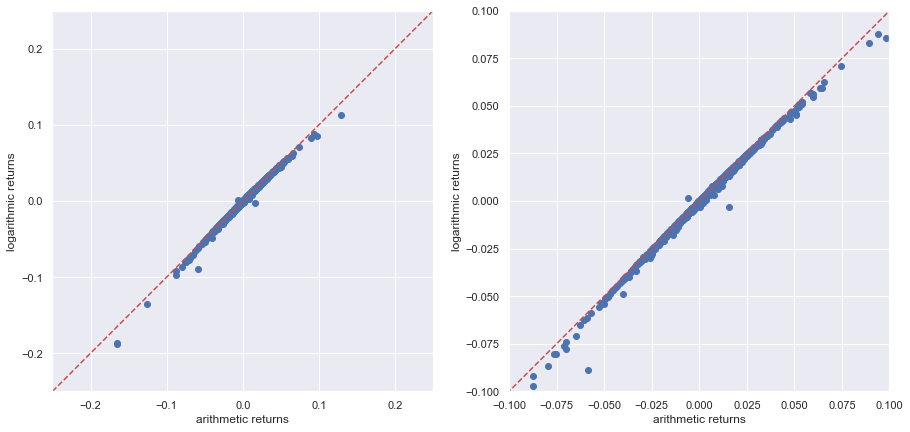

In [9]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
for axes in ax:
    axes.scatter(Portf_return, Portf_log_ret)        #Plot the arithmetic on x-axis and logarithm returns on y-axis
    axes.plot([-0.25, 0.25], [-0.25, 0.25], 'r--')   #Plot a red dashed line as diagonal
    axes.set_xlabel('arithmetic returns')
    axes.set_ylabel('logarithmic returns')
ax[0].set_xlim(-0.25, 0.25)                          #Set limit on the first graph on x and y-axis
ax[0].set_ylim(-0.25, 0.25)
ax[1].set_xlim(-0.1, 0.1)                            #Set narrow limit on the second graph to have a better interpretation
ax[1].set_ylim(-0.1, 0.1);

This graphs shows that if the two returns are centered around zero, (included in [-5%, 5%]), the deviations with the red line are small enough to be neglected because the returns are almost identical. Now, if we look at the tail of the distribution (extreme cases), the difference between the two returns start to be important. For the next step we'll use the `arithmetics returns`.

#### &#8594; Plot the returns

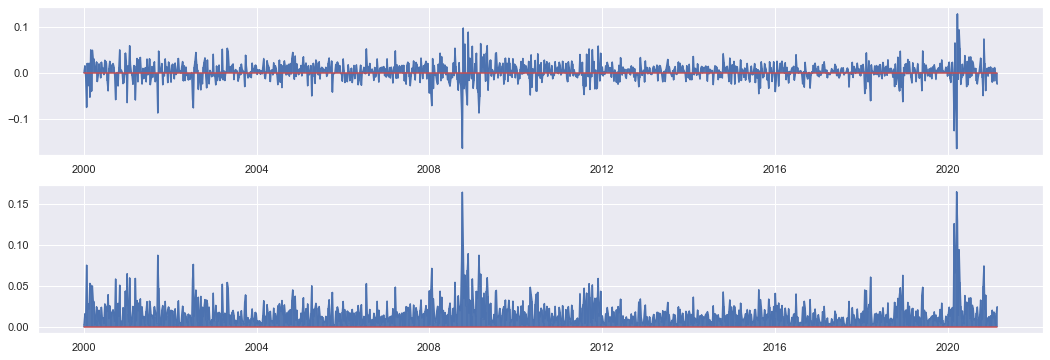

In [10]:
fig, ax = plt.subplots(2, figsize = (18,6))
ax[0].stem(Portf_return.index, Portf_return['P_return'], markerfmt = '');         #markerfmt='' to remove the point' marker
ax[1].stem(Portf_return.index, np.abs(Portf_return['P_return']), markerfmt = ''); #To plot absolute returns

These are the weekly returns of our portfolio during the holding period (from January 2000 to February 2021). We can clearly identify the impact of the two crises:
* **2008: the great Financial crisis** with extreme negative returns (very pronounced on the second graph)
* **2020: the Co-Vid crisis effect** create huge speculation from investors which drives very low negative returns

#### &#8594; Graphical analysis
 * Empirical Cumulative Distribution Function (CDF) plot
 * Kernek Density Estimation (KDE) and histograms plot

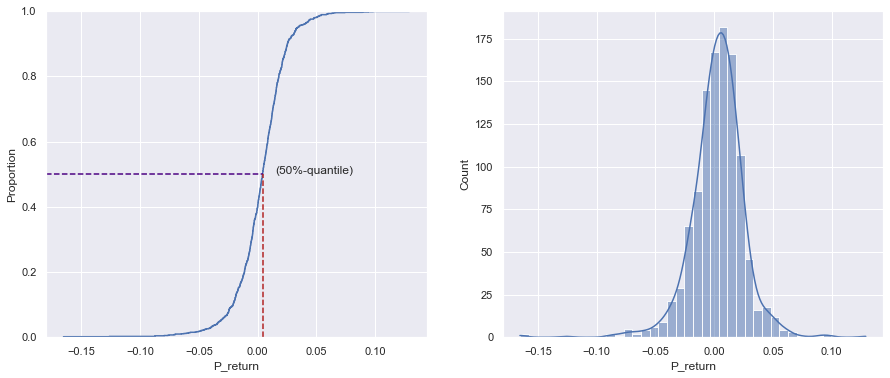

In [11]:
Portf_return = Portf_return.astype(np.float64)                   #Change the type of dataframe as numeric to plot the kde
fig, ax = plt.subplots(1, 2, figsize = (15,6))
sns.ecdfplot(data = Portf_return, x = 'P_return', ax = ax[0])    #plot the CDF of returns as first graph
ax[0].axhline(0.5, xmin = 0, xmax = 0.57,
              c = 'indigo', ls = '--', lw = 1.5)                 #plot a line to highlight the 50% quantile
ax[0].axvline(Portf_return['P_return'].median(), ymin = 0, ymax = 0.5, 
              c = 'firebrick', ls = '--', lw = 1.5)              #The median is the real 50% quantile
ax[0].text(0.015, 0.5, '(50%-quantile)')
sns.histplot(data = Portf_return, x = 'P_return', 
             kde = True, bins = 40, ax = ax[1], label = 'kde');  #Plot histogram and pdf of returns as second graph

The empirical Cumulative Distribution Function presents the probability of the return to be less than a given threshold. For example, we have less than 50% probability to have a negative weekly return (the median is positive). **P(X < 0) = ~45%**. This gives us an idea of the distribution of the times series (slightly centered), which will be confirmed by statistical tests.

The histogram plot combined with the Kernel Density Estimation (KDE) highlight that our data doesn't follow a standard Normal distribution: we have a fatter tail on left and right sides and a huge concentration of data in range between [-2%, 2%].
The unique node, right-centered on the mean enhanced that the probability of positive return is greater than 50%.

#### &#8594; Box plot

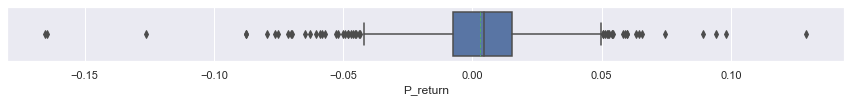

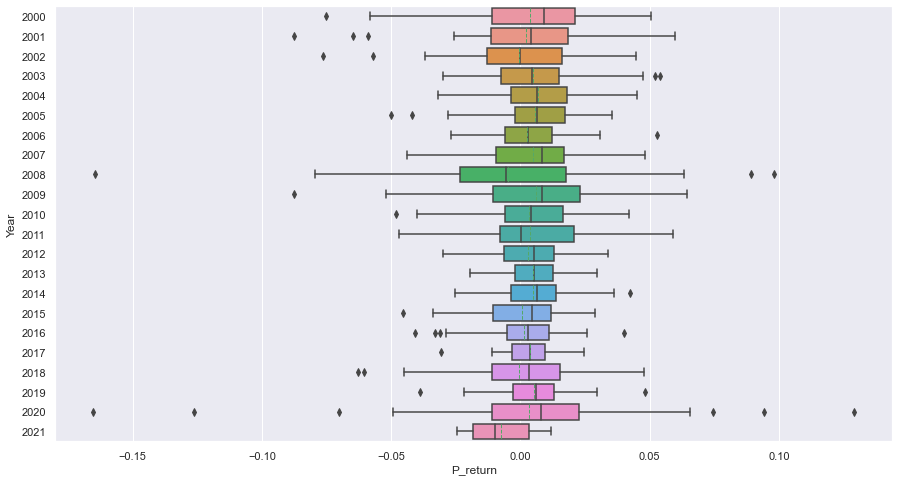

In [12]:
fig, ax = plt.subplots(figsize = (15,1))
sns.boxplot(data = Portf_return, x = 'P_return',                                 #plot boxplot of all observations
            showmeans = True, meanline = True, ax = ax);

Portf_return_year = Portf_return.copy()                                          #Copy the dataframe 
Portf_return_year.loc[:,'Year'] = Portf_return_year.index.year                   #Add a new column named year

fig, ax = plt.subplots(figsize = (15, 8))
sns.boxplot(data = Portf_return_year, x = 'P_return', y = 'Year', orient = 'h',  #plot boxplot breakit down year per year
            showmeans = True, meanline = True, ax = ax);

* The first boxplot shows the distribution of the data from 1st to 3rd quartile. They're very concentrated around a small interval. The distribution is negatively skewed, we have very large negative returns which shift the mean to the left of the median. The whiskers range between *Q1-1.5IQR and Q3+1.5IQR* don't capture the entire data as we can observe a lot of outliers in the representation (fat tail).


* if we break down the data year by year from 2000 to 2021, the sample doesn't behave like the overall population. We have very different levels of volatility depending on the economic factors driving the companies prices and therefore the returns. 2008 and 2020 indeed are the most volatile years which experienced the two crises. However, we can observe some samples as 2004,  2011-2013 where the data are well behaved in the middle.

The average returns aren't aligned across years, we need to proceed to a deeper analysis and test the data for stationarity, non-Normality, autocorrelation and ARCH effect if necessary.

### <a id='section1.D'></a> D $\bullet$ Data testing

#### &#8594; Test for stationarity
To test for stationarity, we'll use the Augmented Dickey-Fuller (ADF) test and the KPSS test.

ADF test:
* **H0:** There is a unit root, the time series is non-stationary 
* **H1:** The time serie is stationary or trend stationary (set by the `regression` parameter).\

In [13]:
res = Sfunction.print_adf_test(Portf_return)

,test statistic,p-value
constant only,-18.3636,0.0
constant and trend,-18.3722,0.0
"constant, and linear and quadratic trend",-18.3652,0.0
"no constant, no trend",-36.0701,0.0


**Conclusion:** The p-value is zero all the time, this means that we reject the null hypothesis, `the data is stationary`.

KPSS test:
* **H0:** 
    - `regression='c'`: the data is stationary around a constant (default).
    - `regression='ct'`: the data is stationary around a trend.
* **H1:** There is a unit root, the time series is non-stationary 

In [14]:
res = Sfunction.print_kpss_test(Portf_return, regression = 'c')

C:\Users\chris\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)
C:\Users\chris\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)


,test statistic,p-value
constant only,0.0710,0.1
constant and trend,0.0358,0.1


**Conclusion:** We can confirm the result obtained in the ADF test with the KPSS test as the two coincide. Here, the p-value is greater than the critical value of 5%. Therefore, we don't reject the null hypothesis and confirm that the portfolio returns  are stationary.

#### &#8594; Test for non-Normality

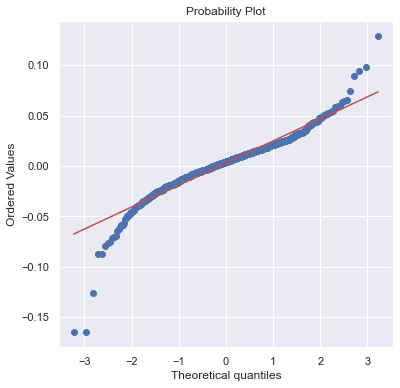

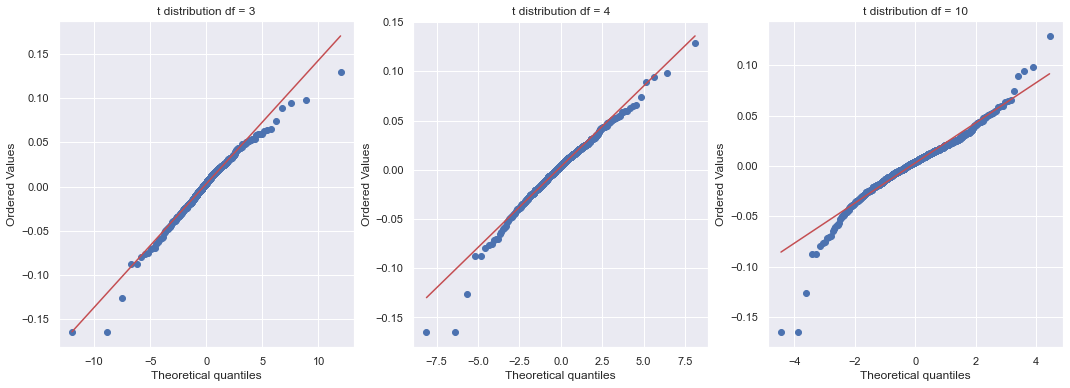

In [15]:
fig, ax = plt.subplots(figsize = (6,6))
fig = stats.probplot(Portf_return.P_return, plot = ax) 

df_list = [3, 4, 10]
fig2, ax = plt.subplots(1, 3, figsize = (18,6))
for i, nu in enumerate(df_list):   
    fig2 = stats.probplot(Portf_return.P_return, dist = 't', sparams = (nu,), plot = ax[i])
    ax[i].set_title(fr't distribution df = {nu:.0f}');

* We can observe here that the fat tails can't be explained by the Normal distribution. We also see some data left and right skewed. This means that the Normal distribution might not be ideal for our data. 
* With the t-distribution, we observe a better fitting of our data. This is even more pronounced with df = 4. The excess kurtosis is wiped out. Nevertheless, we still have some negative skewedness. We can therefore conclude that from our plots, a t-distribution is a better fit.

Fit Normal and Student's $𝑡$ distributions to returns

In [16]:
#Mqximum Likelihood Estimation (MLE)
mu, sigma = stats.norm.fit(Portf_return)                                          #fit data with Normal distribution
nu, loc, scale = stats.t.fit(Portf_return.P_return)                               #fit data with students t-distribution
print('MLE Norm distribution: location={:.4f}, scale={:.4f}'.format(mu, sigma))   #print paramters of Normal distribution
print('MLE t distribution   : location={:.4f}, scale={:.4f}, shape={:.2f}'.format(loc, scale, nu)) 
                                                                                  #print paramters of t-distribution

MLE Norm distribution: location=0.0030, scale=0.0228
MLE t distribution   : location=0.0040, scale=0.0154, shape=3.66


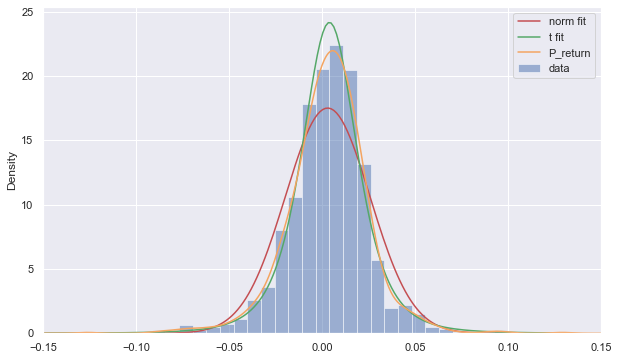

In [17]:
fig, ax = plt.subplots(figsize = (10,6))

res = ax.hist(Portf_return, bins = 40, density = True, alpha = 0.5, label = 'data');
x = np.linspace(res[1].min(), res[1].max(), 200)    #Create equally spaced array from min to max of the histogram plot

ax.plot(x, stats.norm.pdf(x, mu, sigma), 
        color = 'r', label = 'norm fit')            #Plot the pdf of Normal distribution with parameters extracted from MLE
ax.plot(x, stats.t.pdf(x, nu, loc, scale), 
        color = 'g', label = 't fit')               #Plot the pdf of t-distribution with parameters extracted from MLE
Portf_return.plot.kde(ax = ax, 
                      color = 'sandybrown')         #Plot the KDE of data and overlay all pdf on same axis to observe fitting

ax.set_xlim([-.15, .15])                            #Set limits of axis
ax.legend();

In [18]:
Portf_ret_scale = Portf_return.copy()              #Copy the datfarame
Portf_ret_scale *= 100                             #Scale the datfarame
Sfunction.Criteria(Portf_ret_scale.P_return)       #Compute selection criteria for distribution

,norm,t
AIC,4954.7,4731.9
BIC,4964.7,4747.0


**Conclusion:** The AIC and BIC criteria selected the students t-distribution. This means that the additional parameter (shape) in the t-distribution is a better fit and it is enough to cancel the extra penalty generated and captures the peak at node (as we can observe on the graph above). We shall therefore choose to fit our model with a t-distribution rather than a Normal distribution.

Jarque-Bera test:
* **H0:** The sample comes from a Normal distribution
* **H1:** The sample doesn't from a Normal distribution

We perform the Jarque-Bera test on `raw data` and `normalized data` for comparison.

In [19]:
res2 = stats.jarque_bera(Portf_ret_scale)
print(f'Raw data, Jarque-Bera test: statistic={res2.statistic:0.2f} ; p-value={res2.pvalue:0.4f}')  #Test raw data

norm_portf = (Portf_ret_scale - Portf_ret_scale.mean()) / Portf_ret_scale.std()                     #Normalized data
res = stats.jarque_bera(norm_portf)
print(f'Normalized data, Jarque-Bera test: statistic={res.statistic:0.2f} ; p-value={res.pvalue:0.4f}') 
                                                                                                    #Test normalized data

Raw data, Jarque-Bera test: statistic=3087.23 ; p-value=0.0000
Normalized data, Jarque-Bera test: statistic=3087.23 ; p-value=0.0000


**Conclusion:** Now, we can confirm without any doubt that our data is non-Normally distributed.

 #### &#8594; Test for autocorrelation of returns and squared returns

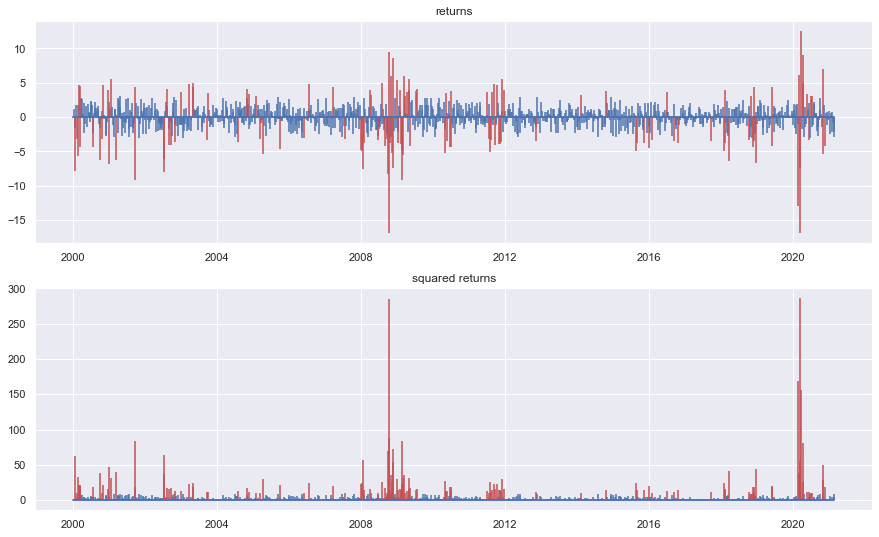

In [20]:
x = Portf_ret_scale - loc * 100      #Center the time series with the location parameters of MLE students t-distribution
mask = np.abs(x) > 3                 #Highlighting the returns greater than 3% in absolute value: 3% is the 95%-quantile

fig, ax = plt.subplots(2, figsize=(15, 9))
ax[0].stem(x[~mask].index, x[~mask].values, linefmt='C0-', markerfmt=' ', basefmt='C0')
ax[0].stem(x[mask].index, x[mask].values, linefmt='C3-', markerfmt=' ', basefmt='C0')
ax[0].set_title('returns')

ax[1].stem(x[~mask].index, x[~mask].values ** 2, linefmt='C0-', markerfmt=' ', basefmt='C0')
ax[1].stem(x[mask].index, x[mask].values ** 2, linefmt='C3-', markerfmt=' ', basefmt='C0')
ax[1].set_title('squared returns');

The result discloses the ARCH eﬀect. There's a clustering of periods of high and low volatilities, much more pronounced with high spikes in October 2008 after the bankruptcy of Lehman Brothers and February 2020 CoVid-19 crises.

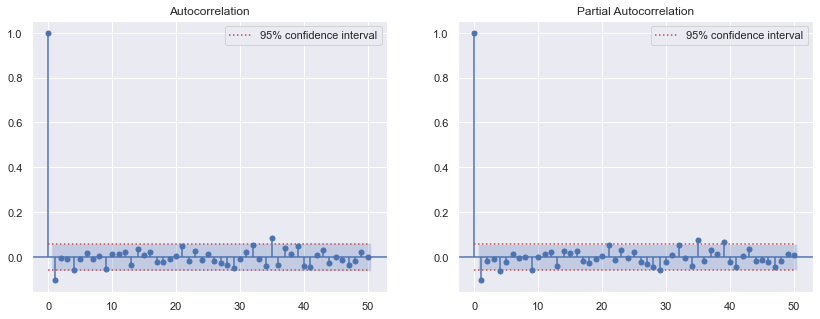

In [21]:
#Apply the autocorrelation and partial autocorrelation function with lags up to 50 to the returns
fig = Sfunction.acf_pacf(x, lags = 50)   

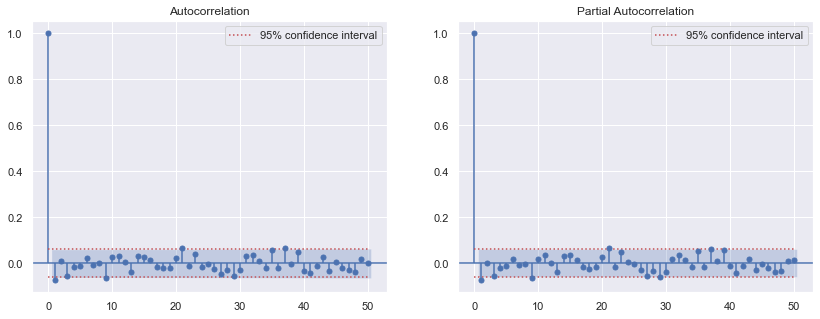

In [22]:
#Apply the autocorrelation and partial autocorrelation function with lags up to 50 to the returns without 2020 outliers
fig = Sfunction.acf_pacf(x.loc[:'2019'], lags = 50)

The clustering of periods of high and low volatility are confirmed by the ACF and PACF. There's no huge impact on the Autocorrelation function of the time series without 2020. We'll keep the entire dataframe for the next step of our study.

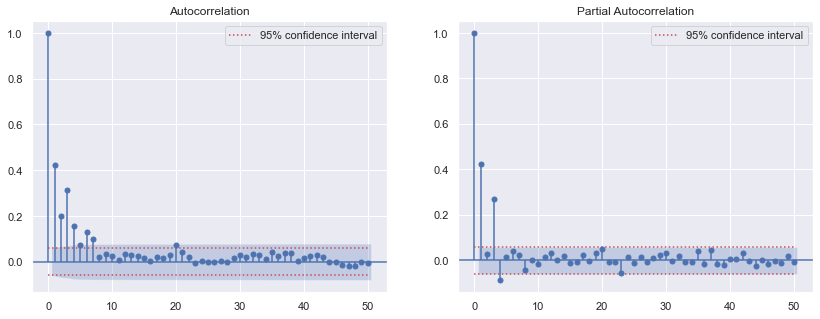

In [23]:
fig = Sfunction.acf_pacf(x ** 2, lags = 50)                                #Apply the function to the squared returns

**Ljung-Box Q test**
* **H0:** There is no autocorrelation, (ρ(1) = · · · = ρ(m) = 0)
* **H1:** There is an autocorrelation, (ρ(h) != 0 for some 1 ⩽ h ⩽ m)

In [24]:
lags = np.array([1, 2, 3, 5, 7, 8, 10, 20, 30])
res = Sfunction.print_acf(x, lags = lags)      #returns the Ljung-Box Q statistic and its p-values for all lags up to nlags

,Q Statistic,p-value (%)
up to lag 1,11.64,0.06
up to lag 2,11.69,0.29
up to lag 3,11.75,0.83
up to lag 5,15.69,0.78
up to lag 7,16.05,2.47
up to lag 8,16.09,4.11
up to lag 10,19.49,3.44
up to lag 20,24.68,21.39
up to lag 30,34.42,26.45


Applied to the returns, it confirms that some autocorrelations are statistically significant up to lag 10 as the p-values are below the significance level of 5%. The returns are very close to White Noise. 
The autocorrelation function applied on squared returns exhibits serial correlation. Although it'll be difficult to predict future values of returns based on past values, it's possible to predict futures values of squared returns and how volatile the market will be.

#### &#8594; Test for Autoregressive Conditional Heteroscedasticity (ARCH) effect
To confirm if there's an ARCH effect, we will use an Engle's test:
* **H0:** There is no ARCH effect, (α1 = . . . = αm = 0)
* **H1:** There is an ARCH effect, (αh !=0 for some 1 ⩽ h ⩽ m)

In [25]:
res = Sfunction.print_engle_test(x)              #Engle test to confirm the ARCH effect

Engle's ARCH Test


,test statistic,p-value
Lagrange Multiplier,281.1939,0.0
F test,37.4669,0.0


**Conclusion:** We see that the p-values are very small compared to the significance level of 5%, thus there's strong evidence that we should reject the null hypothesis, there is an ARCH effect observed in the returns. 

To capture the heteroscedasticity effect, we'll fit our data with a GARCH(p,q) model.

### <a id='section1.E'></a> E $\bullet$ Fitting a GARCH (p, q) model
We look for a GARCH($p, q$) model, with $p$ the number of ARCH lags and $q$ the number of GARCH lags.  
We use a model with a mean equal to 0. The returns are driven by:  
$r_t = \sigma_t \varepsilon_t$  
$\sigma_t^2 = \omega + \sum_{i=1}^p \alpha_i r_{t-i}^2  + \sum_{j=1}^q \beta_j \sigma_{t-j}^2$  

In [26]:
aic, bic = Sfunction.select_garch(x, max_arch = 5, max_garch = 4, mean = 'Zero')  #Seleted the best fitting model

GARCH Lags,0,1,2,3,4
ARCH Lags,,,,,
1,4733.9,4666.3,4668.2,4670.2,4672.2
2,4705.3,4668.3,4670.2,4672.2,4674.2
3,4686.2,4669.7,4671.6,4671.5,4673.5
4,4677.7,4671.7,4673.1,4672.4,4674.4
5,4677.5,4673.7,4675.1,4674.4,4676.4


AIC selected order: (1, 1)


GARCH Lags,0,1,2,3,4
ARCH Lags,,,,,
1,4743.9,4681.3,4688.3,4695.3,4702.3
2,4720.3,4688.3,4695.2,4702.2,4709.2
3,4706.3,4694.8,4701.6,4706.5,4713.5
4,4702.7,4701.8,4708.1,4712.4,4719.4
5,4707.6,4708.8,4715.1,4719.4,4726.5


BIC selected order: (1, 1)


The selection criteria both chose the **GARCH (1, 1) model**. So, we'll fit our data with this model.

In [27]:
model = arch_model(x, p = 1, q = 1, mean = 'Zero')         #Apply the model choosed by BIC criteria with Normal distribution
res_garch11 = model.fit(update_freq = 0, disp = 'off')     #Fit an GARCH(1,1) model to the data to extract the residuals
res_garch11.summary()                                      #summary of the GARCH result to display the estimated model

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:               P_return   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                      GARCH   Log-Likelihood:               -2330.15
Distribution:                  Normal   AIC:                           4666.30
Method:            Maximum Likelihood   BIC:                           4681.32
                                        No. Observations:                 1104
Date:                Fri, May 28 2021   Df Residuals:                     1101
Time:                        17:02:05   Df Model:                            3
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.5124      0.153      3.339  8.399e-04 [  0.212,  0.813]
alpha[1]       0.1936  4.560e-02      4.247  2.171e-05 [  0.104,  0.283]
beta[1]        0.7007  5.637e-02     12.432  1.761e-35 [  0.590,  0.811]
========================================================================

Covariance estimator: robust
"""

All the parameters of the model are statistically significant (p-values < 5%), so we have enough evidence to reject the null hypothesis which states that $\alpha[1]$ = $\beta[1]$ = 0. Nevertheless, we need to perform a residual analysis and fit either a Normal distribution or a students t-distribution according to the relevance of the results.

### <a id='section1.F'></a>F $\bullet$ Residuals analysis

We study the **standardized residuals**, that is $\varepsilon_t = r_t / \sigma_t$  

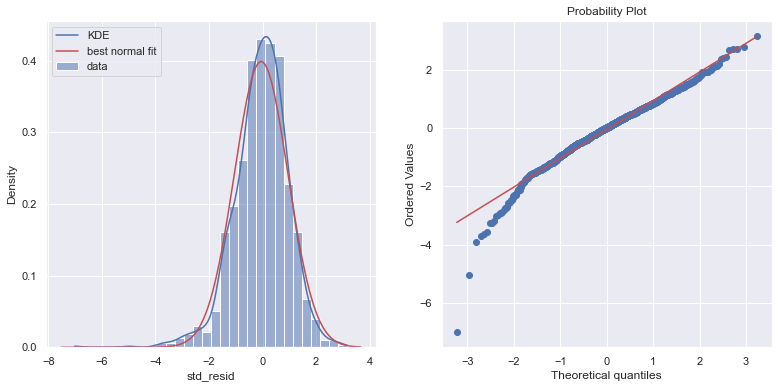

In [28]:
fig = Sfunction.hist_probplot(res_garch11.std_resid, bins = 30) #function designed to analysis residuals plot

Note that the left tail is fatter than the one of a Normal distribution. This suggest using Student's  𝑡  distribution for the standardized errors. We also see some asymmetry (negative skewness: mean < median) which can be dealt with an asymmetric GARCH model.

#### &#8594; Using student's t distribution for the Maximum Likelihood Estimation of the parameters
Instantiate a GARCH(1,1) model with the Student's $t$ distributed standardized residuals.  

In [29]:
model = arch_model(x, p = 1, q = 1, mean = 'Zero', dist = 't') #Apply the model with t-distribution
res_t = model.fit(update_freq = 0, disp = 'off')               #Fit an GARCH(1,1) model to the data to extract the residuals
res_t.summary()                                                #summary of the standardized residuals

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Zero Mean - GARCH Model Results                           
====================================================================================
Dep. Variable:                     P_return   R-squared:                       0.000
Mean Model:                       Zero Mean   Adj. R-squared:                  0.001
Vol Model:                            GARCH   Log-Likelihood:               -2294.62
Distribution:      Standardized Student's t   AIC:                           4597.25
Method:                  Maximum Likelihood   BIC:                           4617.28
                                              No. Observations:                 1104
Date:                      Fri, May 28 2021   Df Residuals:                     1100
Time:                              17:02:07   Df Model:                            4
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.3650      0.145      2.521  1.170e-02 [8.125e-02,  0.649]
alpha[1]       0.1579  4.245e-02      3.720  1.991e-04 [7.473e-02,  0.241]
beta[1]        0.7639  6.237e-02     12.247  1.751e-34   [  0.642,  0.886]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             6.3745      1.199      5.315  1.068e-07 [  4.024,  8.725]
========================================================================

Covariance estimator: robust
"""

Looking at the selection criteria AIC and BIC, they're both lower for the t-distribution meaning that the model is improved (better fitted) with the additional shape parameter nu (statistically significant: p-value almost 0). The global dynamic of the conditional volatility is nearly the same, no huge change in $\omega$, $\alpha[1]$ and $\beta[1]$, they're still significant. So, we'll analyze the residuals of the t-distribution with **`7 degrees of freedom`**.

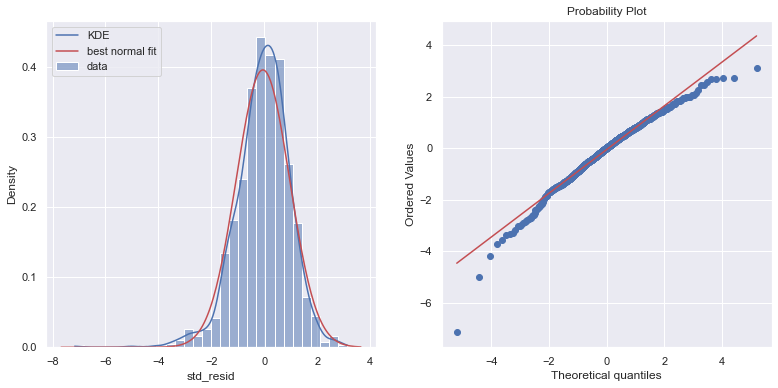

In [30]:
fig = Sfunction.hist_probplot_t(res_t.std_resid, ddof = 7, bins = 30) #Analyze residuals fitted with student t-distribution

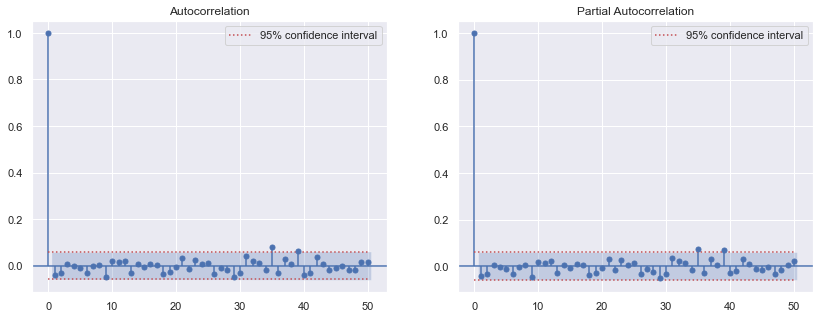

In [31]:
fig = Sfunction.acf_pacf(res_t.std_resid, lags = 50)       #Apply the ACF and PACF function to the residuals

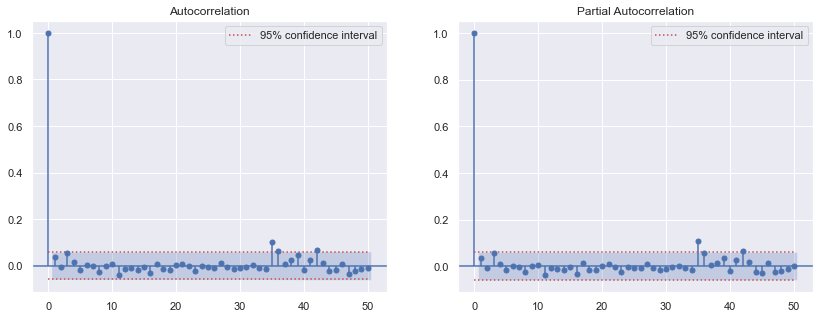

In [32]:
fig = Sfunction.acf_pacf(res_t.std_resid ** 2, lags = 50)  #Apply the ACF and PACF function to the squared residuals

The fit of the standardized residuals are more aligned to the t-distribution from MLE. The serial correlation exhibited on squared returns has completly disappeared on the squared residuals. The standardized residuals and the squared residuals are **White Noise**. The model has properly captured the conditional heteroscedasticity.
<br/> We'll still apply the same tests as before to statistically confirm our conclusion.

#### &#8594; Test for stationarity
ADF test:

In [33]:
res = Sfunction.print_adf_test(res_t.std_resid)            #Test the residuals for stationarity

,test statistic,p-value
constant only,-34.5754,0.0
constant and trend,-34.5782,0.0
"constant, and linear and quadratic trend",-34.5952,0.0
"no constant, no trend",-34.4803,0.0


**Conclusion:** The p-value is zero all the time, this means that we reject the null hypothesis, `the standardized residuals are non stationary`.

#### &#8594; Test for non-Normality
Jarque-Bera test:

In [34]:
res = stats.jarque_bera(res_t.std_resid)                   #Test the residuals for non-Normality
print(f'Jarque-Bera test: statistic={res.statistic:0.2f} ; p-value={res.pvalue:0.4f}')

Jarque-Bera test: statistic=598.90 ; p-value=0.0000


**Conclusion:** We have enough evidence to reject the null hypothesis, `the standardized residuals are non-Normaly distributed`.

 #### &#8594; Test for autocorrelation of standardized residuals
 Ljung-Box Q test:

In [35]:
res = Sfunction.print_acf(res_t.std_resid, lags = lags)     #Test the residuals for autocorrelation 

,Q Statistic,p-value (%)
up to lag 1,1.96,16.17
up to lag 2,2.99,22.44
up to lag 3,3.05,38.40
up to lag 5,3.21,66.81
up to lag 7,4.23,75.33
up to lag 8,4.25,83.35
up to lag 10,7.23,70.38
up to lag 20,11.44,93.39
up to lag 30,19.59,92.67


**Conclusion:** All the p-values are above 5% and increasing with lags, we don't have enough evidence to reject the null hypothesis: `There is no autocorrelation left in the standardized residuals`.

#### &#8594; Test for Autoregressive Conditional Heteroscedasticity (ARCH) effect
Engle's test:

In [36]:
res = Sfunction.print_engle_test(res_t.std_resid)            #Test the residuals for ARCH effect

Engle's ARCH Test


,test statistic,p-value
Lagrange Multiplier,6.7487,0.7489
F test,0.6722,0.7510


**Conclusion:** All the p-values are far above confidence level 5%, the model GARCH(1,1) has properly captured the ARCH effect.

### <a id='section1.G'></a>G $\bullet$ Prediction with GARCH model

#### &#8594; Conditional and unconditional variance / volatility
* **Conditional volatility**

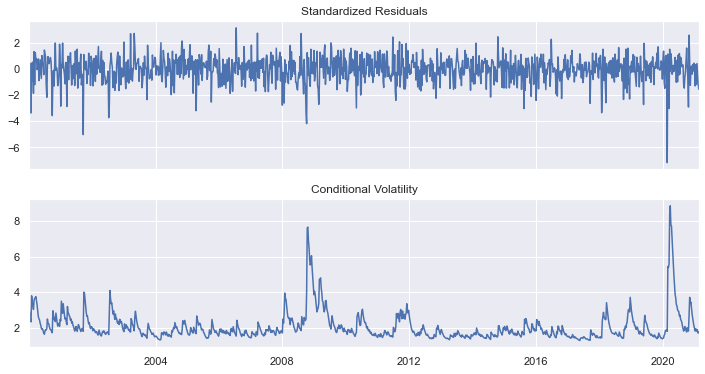

In [37]:
fig = res_t.plot()                            #Plot standardized residuals and Conditional volatility
fig.set_size_inches(12,6)

The conditional volatility of the GARCH model highlights the clustering of high and low periods. The two financial crisis are the most important periods of uncertainty with a worlwide economic impact, but their volatility only lasted for one year max before falling back to a regular the trend.

In [38]:
df = x.copy()                                                              #Copy the dataframe
df['vol'] = res_t.conditional_volatility                                   #Extracted conditional volatility
df['upper'] = stats.t.ppf(0.975, df = res_t.params['nu']) * df['vol']      #Defined the upper bound 97.5%-quantile
df['lower'] = - df['upper']                                                #Defined the lower bound 2.5%-quantile
df['outlier'] = (df['P_return'] > df['upper']) | (df['P_return'] < df['lower'])   
                                                               #Outliers are values lies outside the 95% confidence interval
df.head()                                                      #Show the first rows of dataframe

,P_return,vol,upper,lower,outlier
Date,,,,,
2000-01-03,-0.078037,3.044171,7.344018,-7.344018,False
2000-01-10,1.168259,2.728508,6.582483,-6.582483,False
2000-01-17,-1.525752,2.503478,6.039603,-6.039603,False
2000-01-24,-7.919648,2.349503,5.668141,-5.668141,True
2000-01-31,1.689630,3.806249,9.182517,-9.182517,False


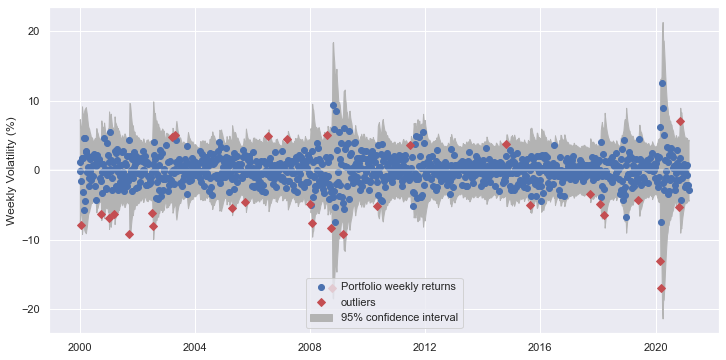

In [39]:
#Plot the returns with the 95% confidence interval and highlight the outliers
fig, ax = plt.subplots(figsize = (12,6))

ax.plot(df['P_return'][~df['outlier']], 'bo', label = 'Portfolio weekly returns')
ax.plot(df['P_return'][df['outlier']], 'rD', label = 'outliers')
ax.fill_between(x.index, df['lower'], df['upper'], color = '0.7', label = '95% confidence interval')
ax.axhline(0, c = 'w', alpha = 0.5)

ax.set_ylabel('Weekly Volatility (%)')
ax.legend(loc = 'lower center');

The outliers are spread across time and not really concentrated on a specific time period. As Portfolio managers, we're concerned about the maximum loss our trading strategy can drive. The VaR-95% is the limit accepted loss at each week. As we can observe, we often breached our barriers few times thereby corroborating the fitting of our model.

* **Unconditional variance of the fitted GARCH process**
Compute the unconditional variance of the GARCH(1,1) process using the formula
$$\gamma(0)=\frac{\omega}{1-(\alpha+\beta)}$$  

In [40]:
#Compute the unconditional volatility with formula above and print it with sample (or MLE of the) volatility
uncond_var = res_t.params['omega'] / (1 - (res_t.params['alpha[1]'] + res_t.params['beta[1]']))
print(f'Unconditional volatility of GARCH process = {np.sqrt(uncond_var):.5f}')
print(f'Sample volatility of returns              = {x.std(ddof = 0)[0]:.5f}')

Unconditional volatility of GARCH process = 2.16059
Sample volatility of returns              = 2.27782


The two values are not too far from each others, so we can state that our model is a good predictor.

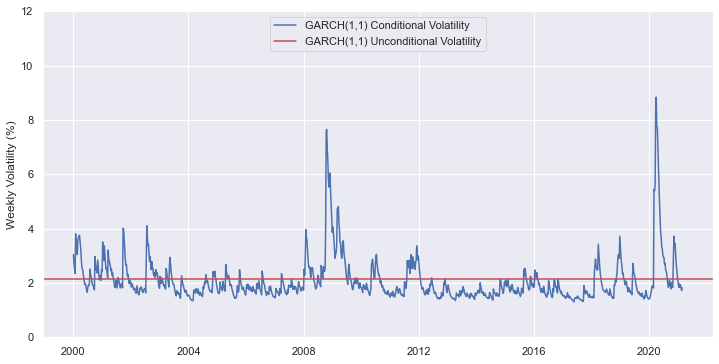

In [41]:
#Plot of the GARCH(1,1) conditional and unconditional volatilities
fig, ax = plt.subplots(figsize = (12,6))

ax.plot(res_t.conditional_volatility, label = 'GARCH(1,1) Conditional Volatility')
ax.axhline(np.sqrt(uncond_var), color = 'r', label = 'GARCH(1,1) Unconditional Volatility')

ax.set_ylabel('Weekly Volatility (%)')
ax.set_ylim([0, 12])
ax.legend(loc = 'upper center');

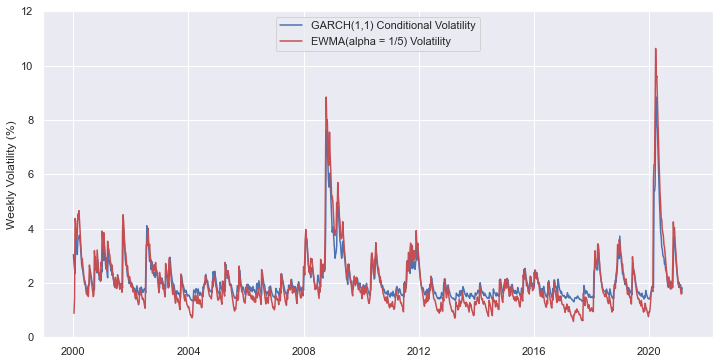

In [42]:
#Comparing with Exponentially Weighted Moving Average (EWMA) volatility with gain alpha = 1/5 
                                                                     #weight of the most recent observation in the EWMA
fig, ax = plt.subplots(figsize = (12,6))

ax.plot(res_t.conditional_volatility, label = 'GARCH(1,1) Conditional Volatility')
ax.plot(x.ewm(alpha = 1/5).std(), c = 'r', label = 'EWMA(alpha = 1/5) Volatility')
ax.set_ylabel('Weekly Volatility (%)')
ax.set_ylim([0, 12])
ax.legend(loc = 'upper center');

EWMA (Exponentially weighted moving average) tries to solve the problem of slow reaction to new information and the equal importance of returns. Using an alpha as a weighting factor, it gives more importance to recent returns and less to data far in the past by slowly decaying their contribution to the VaR. Through this, the measure limits the **`echo effect`**, occurring when a large shock of the past becomes too old to be considered and leaves the estimation, causing a big change in the VaR which is not due to a change in the markets. 
<p style="text-align: center;">$\hat{\sigma}^2_{EWMA}$(t) = $\alpha$$r^2_{t}$ + (1-$\alpha$)$\hat{\sigma}^2_{EWMA}$(t-1) </p>

*For further steps of Portfolio management study, we can propose build a VaR model based on this method (not the aim of the project)*.

#### &#8594; Forecasting conditional volatility


In [43]:
f = res_t.forecast(horizon = 100)                                  #time horizon in weeks (100 weeks = 2 years)

In [44]:
vol_forecast = Sfunction.garch_cond_vol_forecast(f)                #forecast volatility at given time horizon

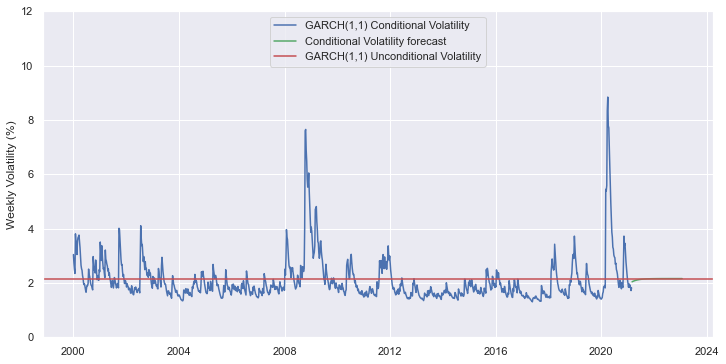

In [45]:
fig, ax = plt.subplots(figsize = (12,6))                           #plot the conditional volatility forecast

ax.plot(res_t.conditional_volatility, label = 'GARCH(1,1) Conditional Volatility')
ax.plot(vol_forecast, 'g', label = 'Conditional Volatility forecast')
ax.axhline(np.sqrt(uncond_var), color = 'r', label = 'GARCH(1,1) Unconditional Volatility')

ax.set_ylabel('Weekly Volatility (%)')
ax.set_ylim([0, 12])
ax.legend(loc = 'upper center');

**Conclusion of the analysis:** The trading period ends in February 2021 with a low volatility and the model predicts an increasing trend on the following weeks. As we increase the forecasting horizon (looking at out-sample data), the weekly volatility will converge on average towards the GARCH (1,1) unconditional volatility 2.16% based on in-sample data which is the best prediction without any future information. The GARCH (1,1) model is a long-memory process, which means that the periods of high volatility driven by the financial crisis of 2008 and 2020 affect the unconditional long-term volatility forecast. At equal amplitude, the negative returns shocks have higher volatility than positive returns. 

The returns and the standardized residuals are defined as white noise, it's difficult to predict the future values of portfolio returns looking at past values. Based on this assumption, we need to review our entire trading strategy. *Can we build a model to predict the performance of a stock return looking at its companies attributes (**Market capitalization, Price-to-Book ratio, 1 month volatility**, ...) and the economy of the region where it's located?* 

The next step of our study is to analyze macroeconomics data and their real impact on stock performance. 

## <a id='section2'></a> 2 $\bullet$ Macroeconomics study
____

As seen in the study above, we can difficulty predict the future values of portfolio returns looking at past returns. This challenges our portfolio construction process based on Markovitz theory. Can we predict the companies that will outperform the crowd? If yes, what'll be the input of such a model? Our data is the same dataset as before. It consists of monhtly financial information pertaining to 30 large US firms. They are characterised by their **ticker** symbol and six specific attributes:
* Closing price (**Close**)
* 1 month volatility (**Vol_1M**)
* Market capitalisation in M$ (**Mkt_Cap**)
* Price-to-book ratio (**P2B**)
* Debt-to-equity ratio (**D2E**)
* Profitability margin (**Prof_Marg**)
* Environmental, Social, and Corporate Governance rank (**ESG_rank**).

In addition to the companies informations, we'll merge macroeconomics data of the US region: 
* Real Gross Domestic Product (**GDP**)
* Unemployment Rate 
* Consumer Price Index for All Urban Consumers (**CPI**)
* 10-Year Treasury Minus 2-Year Treasury Constant Maturity

We'll interpolate all these inputs as predictors and try to forecast the future returns.

### <a id='section2.A'></a>A $\bullet$ Preprocessing data for regression

In [46]:
regdata = pd.read_csv('Macroeconomics_data.csv')                #import csv 
regdata['Date'] = pd.to_datetime(regdata['Date'])               #set column date as date format
regdata.set_index('Date', inplace = True)                       #set date column as index
regdata.head()                                                  #show first rows of dataframe

,Tick,Close,Vol_1M,Mkt_Cap,P2B,D2E,Prof_Marg,ESG_rank
Date,,,,,,,,
1999-12-31,AAPL,0.791,53.644,16532.1468,3.3485,9.6649,8.3084,NaN
2000-01-31,AAPL,0.798,80.839,16682.8958,3.3790,6.7966,7.8105,NaN
2000-02-29,AAPL,0.882,59.974,18480.3009,3.7332,6.7966,7.8105,NaN
2000-03-31,AAPL,1.044,75.664,21896.2344,4.6817,6.7966,7.8105,NaN
2000-04-28,AAPL,0.954,81.615,20001.8524,4.2766,7.1174,11.9794,NaN


In [47]:
#Download macroeconomics data on FRED and duplicate dataframe to meet regdata length
start = datetime.datetime(1999, 11, 30)                                             #start date: December 31st, 1999 
end = datetime.datetime(2021, 2, 28)                                                #end date: February 28th, 2021

macro_data = pdr.get_data_fred(['UNRATE', 'CPIAUCSL', 'T10Y2YM'], start, end)       #(frequency: monthly)
macro_data = pd.concat([macro_data] * len(regdata['Tick'].unique()))                #Duplicate dataframe by numbers of assets

In [48]:
#mapping data by year and month
mapping = dict(zip(macro_data.index.to_period('M'), macro_data['UNRATE']))
mapping2 = dict(zip(macro_data.index.to_period('M'), macro_data['CPIAUCSL']))
mapping3 = dict(zip(macro_data.index.to_period('M'), macro_data['T10Y2YM']))

#merge the two dataframes based on the index with the same year and month
regdata = regdata.assign(UNRATE = macro_data.index.to_period('M').map(mapping))
regdata = regdata.assign(CPI = macro_data.index.to_period('M').map(mapping2))
regdata = regdata.assign(T10Y2YM = macro_data.index.to_period('M').map(mapping3))

regdata.head()

,Tick,Close,Vol_1M,Mkt_Cap,P2B,D2E,Prof_Marg,ESG_rank,UNRATE,CPI,T10Y2YM
Date,,,,,,,,,,,
1999-12-31,AAPL,0.791,53.644,16532.1468,3.3485,9.6649,8.3084,NaN,4.0,168.8,0.18
2000-01-31,AAPL,0.798,80.839,16682.8958,3.3790,6.7966,7.8105,NaN,4.0,169.3,0.22
2000-02-29,AAPL,0.882,59.974,18480.3009,3.7332,6.7966,7.8105,NaN,4.1,170.0,-0.09
2000-03-31,AAPL,1.044,75.664,21896.2344,4.6817,6.7966,7.8105,NaN,4.0,171.0,-0.27
2000-04-28,AAPL,0.954,81.615,20001.8524,4.2766,7.1174,11.9794,NaN,3.8,170.9,-0.41


In [49]:
#Compute stock Past return and Future return
liste = [(regdata[regdata['Tick'] == i]['Close'] / regdata[regdata['Tick'] == i]['Close'].shift(1)) - 1 
         for i in regdata['Tick'].unique()]

regdata['P_return'] = [liste[i][j] for i in range(len(liste)) for j in range(len(liste[i]))]
regdata['F_return'] = regdata.groupby('Tick')['P_return'].shift(-1)

In [50]:
regdata.sort_values(['Date', 'Tick'], inplace = True)   #sort values by index and Tick
regdata.head()

,Tick,Close,Vol_1M,Mkt_Cap,P2B,D2E,Prof_Marg,ESG_rank,UNRATE,CPI,T10Y2YM,P_return,F_return
Date,,,,,,,,,,,,,
1999-12-31,AAPL,0.7910,53.644,16532.1468,3.3485,9.6649,8.3084,NaN,4.0,168.8,0.18,NaN,0.008850
1999-12-31,BA,26.7470,34.880,37327.5621,2.0321,58.7332,4.3553,NaN,4.0,168.8,0.18,NaN,0.073915
1999-12-31,BAC,14.5279,41.437,85822.5793,1.0987,411.1294,23.5250,NaN,4.0,168.8,0.18,NaN,-0.034864
1999-12-31,C,258.1057,30.874,187485.8906,2.2994,480.9603,11.9909,NaN,4.0,168.8,0.18,NaN,0.023569
1999-12-31,CSCO,40.0554,31.759,355119.3750,19.1303,0.0000,10.5921,NaN,4.0,168.8,0.18,NaN,0.022169


In [51]:
regdata = regdata.drop(columns = ['Tick', 'Close', 'ESG_rank'])
  #drop unnecessary columns Tick, Close(it's not a predictor) and ESG_rank (not enough values, starting at 2014)

regdata.dropna(subset = ['P_return', 'F_return'], inplace = True) #drop 1st and last row of stock returns
regdata.reset_index(drop = True, inplace = True)                  #drop index (data column)
regdata.head()

,Vol_1M,Mkt_Cap,P2B,D2E,Prof_Marg,UNRATE,CPI,T10Y2YM,P_return,F_return
0,80.839,16682.8958,3.3790,6.7966,7.8105,4.0,169.3,0.22,0.008850,0.105263
1,39.552,40086.3111,2.1823,58.7332,4.3553,4.0,169.3,0.22,0.073915,-0.167108
2,56.102,82830.0112,1.0604,411.1294,23.5250,4.0,169.3,0.22,-0.034864,-0.050323
3,48.075,191904.7500,2.3536,480.9603,11.9909,4.0,169.3,0.22,0.023569,-0.089583
4,47.132,362992.5000,17.0732,0.0000,18.7285,4.0,169.3,0.22,0.022169,0.207193


We want to see if those elements, characteristics of companies and macroeconomics data impact the returns. To do this, we will perform a OLS regression analysis to estimate their significance in predicting these future returns.

### <a id='section2.B'></a>B $\bullet$ Ordinary Least Squares (OLS) regression

To carry on our analysis, let's consider the following :
* **X:** Vol_1M, Mkt_Cap, P2B, D2E, Prof_Marg, UNRATE, CPI, T10Y2YM, P_return 
* **Y:** F_Return

Let's scale our data to have standradized values for better prediction

In [52]:
X = regdata.drop(columns = 'F_return')                            #set predictors
Y = regdata['F_return']                                           #set predicted variable
Y = Y.values.reshape(Y.shape[0], 1)                               #reshape vector (n) as dataframe (n,1)

                                                                  #Scaling the data: uniformalization (they're between 0 and 1)
X_scaled = (X - X.min(axis = 0)) / (X.max(axis = 0) - X.min(axis = 0))

We proceed by creating the Regressor from sci-kit learn’s Linear Regression Module

In [53]:
regressor = LinearRegression()                   #We create the regressor
regressor.fit(X_scaled, Y)                       #We fit our independent and dependent variables to the regressor
print('Intercept: \n', regressor.intercept_)
print('Coefficients: \n', regressor.coef_)

Intercept: 
 [-0.02827305]
Coefficients: 
 [[ 0.01003967 -0.04584739  0.00314488 -0.01563856  0.07740488  0.04284314
   0.00543251 -0.01459751 -0.00468603]]


Let's display a comprehensive table with statistical informations generated by statsmodels.

In [54]:
est = sm.OLS(Y, sm.add_constant(X_scaled)).fit()                  #perform OLS regression
print(est.summary())                                              #print summary

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     7.036
Date:                Fri, 28 May 2021   Prob (F-statistic):           3.40e-10
Time:                        17:02:19   Log-Likelihood:                 8305.6
No. Observations:                7590   AIC:                        -1.659e+04
Df Residuals:                    7580   BIC:                        -1.652e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0283      0.012     -2.358      0.0

In [55]:
print('MSE of the residuals: \n', est.mse_resid)
print('Total mean squared error: \n', est.mse_total)

MSE of the residuals: 
 0.006570770690182158
Total mean squared error: 
 0.006617802100243586


**Remarks:** The $R^2$ equals to 0.8%, shows a low prediction power of such model, which is compatible with a stochastic process. The kurtosis exhibits a fatter tail students and the Jarque-Bera test suggest to fit the data with a students t-distribution. The mean square error (MSE) is 6.62‰ (66.18 in scaled value), tells us that our model isn't overfitting on our dataset and will worked on other sample.
The next step of the study is to develop a machine learning process with a broader population and more variables to extract the patterns and predict returns on each company based on their main features and the economy state (*will be explored in further detail in the coming months, not the aim of this project*). 

## <a id='section3'></a>  Conclusion

Considering a significance level of 95%, we can conclude that there are four main factors that could impact the future returns of a stock. They include :
1. **Market capitalisation** which is the total value of a company's shares on a stock market
2. **Profitability margin** which gauges the degree to which a company makes money, essentially by dividing income by revenues
3. **unemployment rate** represents the number of unemployed as a percentage of the labor force
4. **10-Year Minus 2-Year Treasury** represents the interest rate spreads between 10-Year and 2-Year Treasury bond with constant Maturity

This is seen from the table above with their pvalues all less than or equal to 0.05. If we adopt a more conservative threshold (1%), only the **Prof_Marg** and **UNRATE** remains significant. The negative coefficient of Mkt_Cap tells us that the small firms performed better than the big ones. It is also notable that the past returns alone have little predictive power over future returns as they are mostly considered as white noises. <br/> This approach has been developed in 1992 by Fama French paper in which he proved that (some) ﬁrm characteristics drive future proﬁtability. As a reslut, as portfolio managers, we'd base our selection of stocks on these factors inorder to maximize our future returns.  So, instead of just looking in the past and take position accordingly, we should build our strategy according to these risks factors while considering the evolution of the future state of the economy. Across a wide range of stocks, we should first screen to select long small firms with high Prof_Marg and among them, focus on companies with a good green factor (ESG rate). This allocation doesn't guarantee the highest returns but increase the probability to outperform the benchmarks in the next months.